In [1]:
import os
import plotters
import reader
from DataTransformer import DataTransformer

%load_ext autoreload
%autoreload 2

os.chdir('../') # work from project root so the reader gets the right paths
print(os.getcwd())

/home/linus/Dokumente/Studium/Master/Amsterdam/02_DisSys/Project/CloudScheduling/plotter_4_cloud


In [8]:
data = reader.sort_dfs(["Random",])
transformer = DataTransformer(data)

# ECDF for makespan

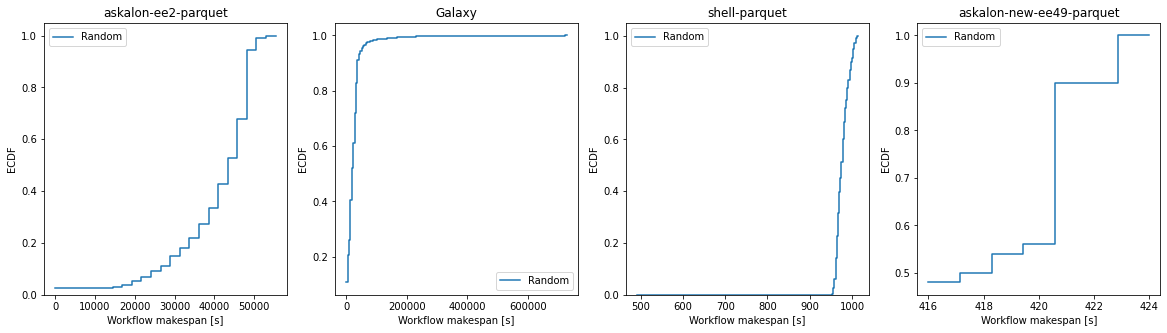

In [10]:
ecdf_data, ecdf_meta = transformer.to_makespan_cdf_per_workflow("homogeneous", "scale2", "exp_workload_ecdf.png")

plotters.create_makespan_cdf_order_policy(ecdf_data, ecdf_meta) # although created for exp 1, this works here just fine :)

# Electricity

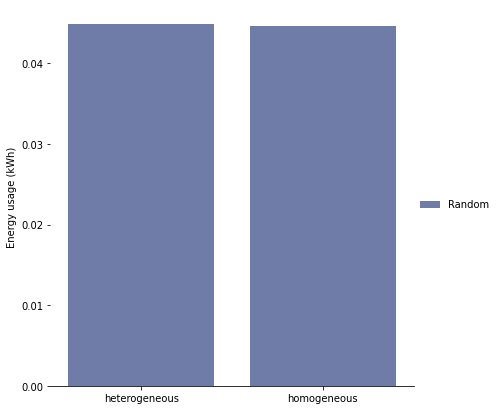

In [4]:
#electricity_data, electricity_meta = transformer.to_energy_exp_environment("shell-parquet", "scale2","exp_env_electricity.png")

#plotters.create_energy_plot_env(electricity_data, electricity_meta)

# Utilization

In [9]:
utilization_data, utilization_meta = transformer.to_utilization_table_workload("homogeneous", "scale2", "exp_workload_utilization.png")

utilization_data

,askalon-ee2-parquet,Galaxy,shell-parquet,askalon-new-ee49-parquet
policy,,,,
Random,0.793551,0.075023,0.744178,0.70506
